<a href="https://colab.research.google.com/github/yewh86/utmmachinelearning/blob/master/Data_Mining_Churn_Data_06042019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Select Attributes for input(X) and output(y)*

In [0]:
gender_X=df['gender']
partner_X=df['Partner']
dependents_X=df['Dependents']
phoneService_X=df['PhoneService']


streamingTV_y = df['StreamingTV']

*Convert String to Numeric*

In [0]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()

#input variable
encoder.fit(gender_X)
encoded_gender_X = encoder.transform(gender_X)

encoder.fit(partner_X)
encoded_partner_X = encoder.transform(partner_X)

encoder.fit(dependents_X)
encoded_dependents_X = encoder.transform(dependents_X)

encoder.fit(phoneService_X)
encoded_phoneService_X = encoder.transform(phoneService_X)

#target variable
encoder.fit(streamingTV_y)
encoded_y = encoder.transform(streamingTV_y)

*Put input data into one table*

In [0]:
encoded_X = np.array([encoded_gender_X,encoded_partner_X, encoded_dependents_X, encoded_phoneService_X])

*Convert input table into pandas*

In [8]:
encoded_df_X =pd.DataFrame(encoded_X).T
encoded_df_X.columns=['gender', 'partner', 'dependents', 'phoneServices']
encoded_df_X.head()


,gender,partner,dependents,phoneServices
0,0,1,0,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,0
4,0,0,0,1


*Put output data into pandas*

In [9]:
encoded_df_y =pd.DataFrame(encoded_y)
encoded_df_y.columns=['target']
encoded_df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


*Combine input and target in one table*

In [10]:
churn_df = pd.concat([encoded_df_X, encoded_df_y], axis = 1)
churn_df.head()

,gender,partner,dependents,phoneServices,target
0,0,1,0,0,0
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0


*Manually divide data into training and testing*

In [0]:
train_data = churn_df[:-10]
test_data = churn_df[:-10]

train_input = train_data[['gender', 'partner', 'dependents', 'phoneServices']]
train_target = train_data['target']

test_input = test_data[['gender', 'partner', 'dependents', 'phoneServices']]
test_target = test_data['target']

*Machine learning modelling using ANN*

In [19]:
#Training

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (10,), activation='relu', solver = 'adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=500, shuffle=True, random_state=1, tol=0.0001, verbose=0, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
model.fit(train_input, train_target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
## Testing
y_pred = model.predict(test_input)
y_true = test_target

*Evaluate the model*

In [27]:
##mse
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_true, y_pred)
print ('MSE:', result_mse)

##accuracy 
from sklearn.metrics import accuracy_score
result_acc = accuracy_score(y_true, y_pred)
print('ACC:', + result_acc)
      
## confusion matrix
from sklearn.metrics import confusion_matrix
result_confMatrix = confusion_matrix(y_true, y_pred)
print('Conf Mat:', + result_confMatrix)

MSE: 1.5397412199630314
ACC: 0.4524385041945116
Conf Mat: [[1777    0 1030]
 [ 787    0  738]
 [1296    0 1405]]


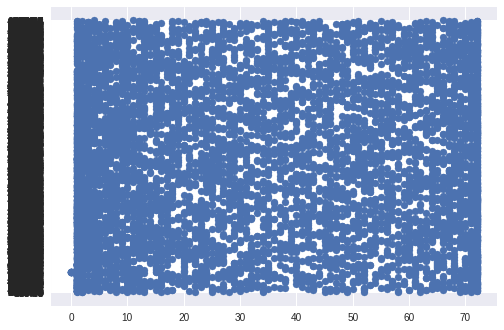

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df['tenure'], df['TotalCharges'])

In [0]:
plt.show()